# Assignment
## Problem Statement:
Multiple linear regression model for the prediction of demand for shared bikes.
- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands


In [87]:
#Python Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Steps for MLR:
1. Reading, understanding and visualising the data
2. Preparing the data for modelling (split training and testing data, rescalling etc.)
3. Train the model
4. Residual Analysis
5. Predictions and evaluation on test set

## 1. Reading, Understanding and visualising the data

In [88]:
df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Notes:
- The model should be built taking this 'cnt' as the target variable.
- Variables like 'weathersit' and 'season', are categorical variable.
- 'yr' might be a good variable for prediction.

In [89]:
# Drop the instant variable. It is just showing the index.
df = df.drop('instant', axis=1)
# Drop the date column since we have the yr, mnth and weekday columns.
df = df.drop('dteday', axis=1)
# The cnt is the sum of casual and registered, we can drop these columns also.
df = df.drop('casual', axis=1)
df = df.drop('registered', axis=1)

In [90]:
cont_var = ['temp', 'atemp', 'hum', 'windspeed']
cat_var = ['season', 'holiday', 'workingday', 'weathersit', 'yr', 'mnth', 'weekday']

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


### Note:
- No column has the null value.

In [92]:
df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


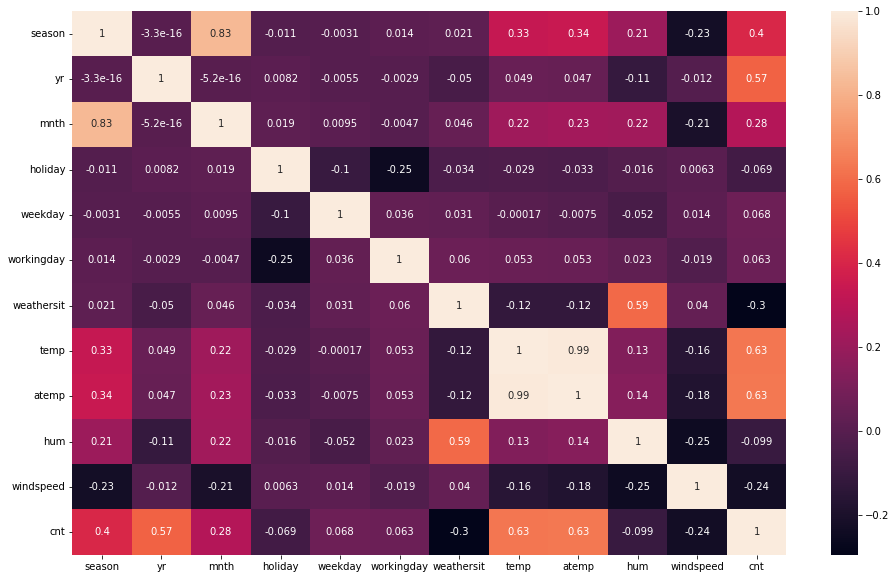

In [93]:
#Visualize the correlation between all variables.
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), annot=True) #In the form of visulisation
plt.show()

Note:
- Here looks like the cnt variable is highly correlated with yr, temp, atemp.

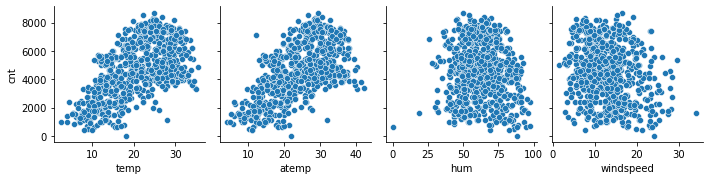

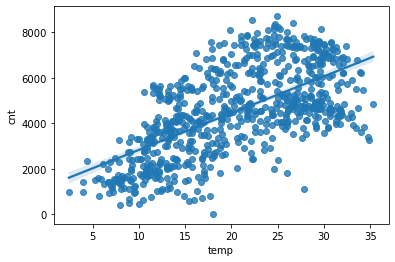

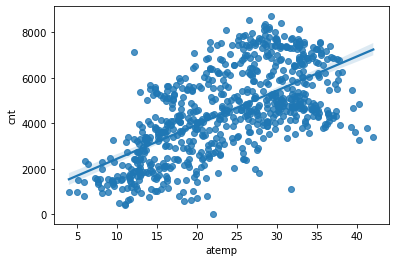

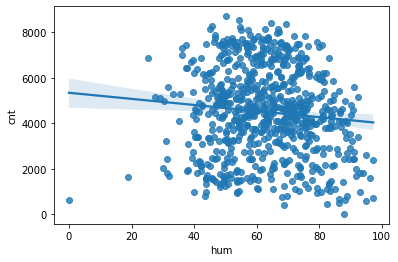

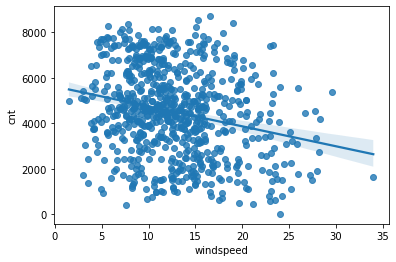

In [94]:
#Visualize the data for continues variable
sns.pairplot(x_vars=cont_var, y_vars=['cnt'], data=df)
plt.show()

#Separate chart
sns.regplot(x="temp", y="cnt", data=df)
plt.show()
sns.regplot(x="atemp", y="cnt", data=df)
plt.show()
sns.regplot(x="hum", y="cnt", data=df)
plt.show()
sns.regplot(x="windspeed", y="cnt", data=df)
plt.show()

## Notes:
1. Here temp and atemp has the good positive relation with cnt variable.
2. Here cnt has some -ve relation with hum var.
3. Here cnt has good -ve relation with windspeed.

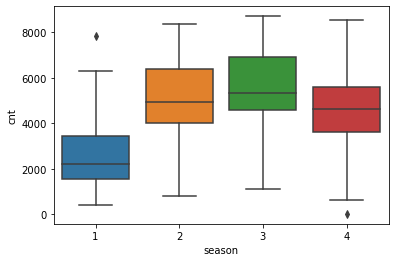

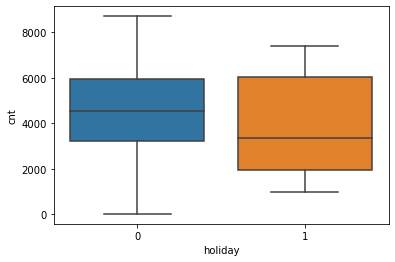

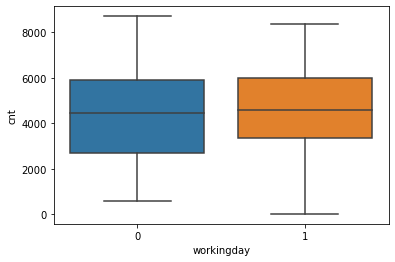

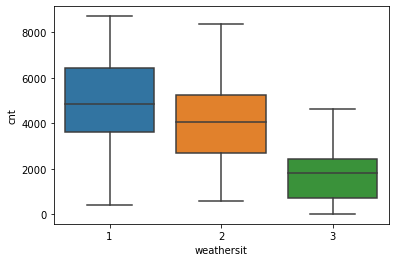

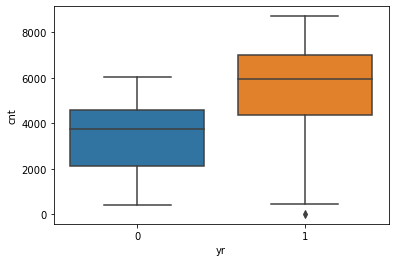

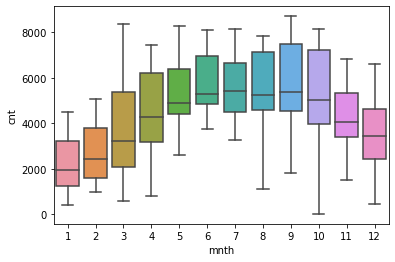

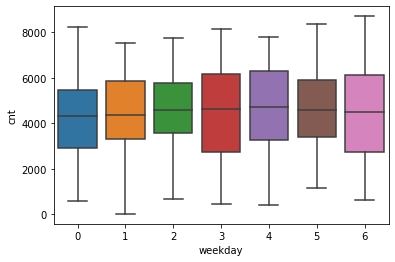

In [95]:
#Visualize the data for categorical variable
#cat_var = ['season', 'holiday', 'workingday', 'weathersit', 'yr', 'mnth', 'weekday']

sns.boxplot(x='season', y='cnt', data=df)
plt.show()

sns.boxplot(x='holiday', y='cnt', data=df)
plt.show()

sns.boxplot(x='workingday', y='cnt', data=df)
plt.show()

sns.boxplot(x='weathersit', y='cnt', data=df)
plt.show()

sns.boxplot(x='yr', y='cnt', data=df)
plt.show()

sns.boxplot(x='mnth', y='cnt', data=df)
plt.show()

sns.boxplot(x='weekday', y='cnt', data=df)
plt.show()

## Notes:
1. Here fall season got high cnt median value and less is spring season.
2. Without holiday, cnt affecting more.
3. Clear weather, affecting cnt more.
4. In 2019, the cnt is increased more than 2018.
5. June-September, the cnt affecting more.

## 2. Preparing the data for modelling

### a. Split the data into training and testing sets.

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
# Split the data in 70-30 ratio.
df_train, df_test = train_test_split(df, train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 12)
(220, 12)


In [98]:
df_train.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
576,3,1,7,0,2,1,1,29.246653,33.1448,70.4167,11.083475,7216
426,1,1,3,0,6,0,2,16.980847,20.6746,62.1250,10.792293,4066
728,1,1,12,0,0,0,1,10.489153,11.5850,48.3333,23.500518,1796
482,2,1,4,0,6,0,2,15.443347,18.8752,48.9583,8.708325,4220
111,2,0,4,0,5,1,2,13.803347,16.0977,72.9583,14.707907,1683


### b. Rescalling the data

In [99]:
from sklearn.preprocessing import MinMaxScaler

In [100]:
# Here we can convert the below columns. Others are already having the value as 0 or 1.
convt_col = ['temp', 'atemp', 'hum', 'windspeed', 'season', 'mnth', 'weekday', 'weathersit', 'cnt']

In [101]:
# We will rescale the value using Min-Max between 0-1.
scaler = MinMaxScaler()
df_train[convt_col] = scaler.fit_transform(df_train[convt_col])
df_train.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
576,0.666667,1,0.545455,0,0.333333,1,0.0,0.815169,0.766351,0.725633,0.264686,0.827658
426,0.000000,1,0.181818,0,1.000000,0,0.5,0.442393,0.438975,0.640189,0.255342,0.465255
728,0.000000,1,1.000000,0,0.000000,0,0.0,0.245101,0.200348,0.498067,0.663106,0.204096
482,0.333333,1,0.272727,0,1.000000,0,0.5,0.395666,0.391735,0.504508,0.188475,0.482973
111,0.333333,0,0.272727,0,0.833333,1,0.5,0.345824,0.318819,0.751824,0.380981,0.191095


In [102]:
df_train.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.504575,0.507843,0.503743,0.025490,0.498366,0.676471,0.201961,0.537440,0.513156,0.650480,0.320883,0.513499
std,0.370078,0.500429,0.315038,0.157763,0.336182,0.468282,0.273944,0.225858,0.212410,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.333333,0.000000,0.181818,0.000000,0.166667,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.666667,1.000000,0.545455,0.000000,0.500000,1.000000,0.000000,0.542596,0.529718,0.653714,0.296763,0.518638
75%,0.666667,1.000000,0.818182,0.000000,0.833333,1.000000,0.500000,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Note:
- Rescalled between 0-1. We can see here that all has max value as 1.

## 3. Training the model
- Here we will include one by one variable to improve the model.

In [103]:
import statsmodels.api as sm 

<AxesSubplot:>

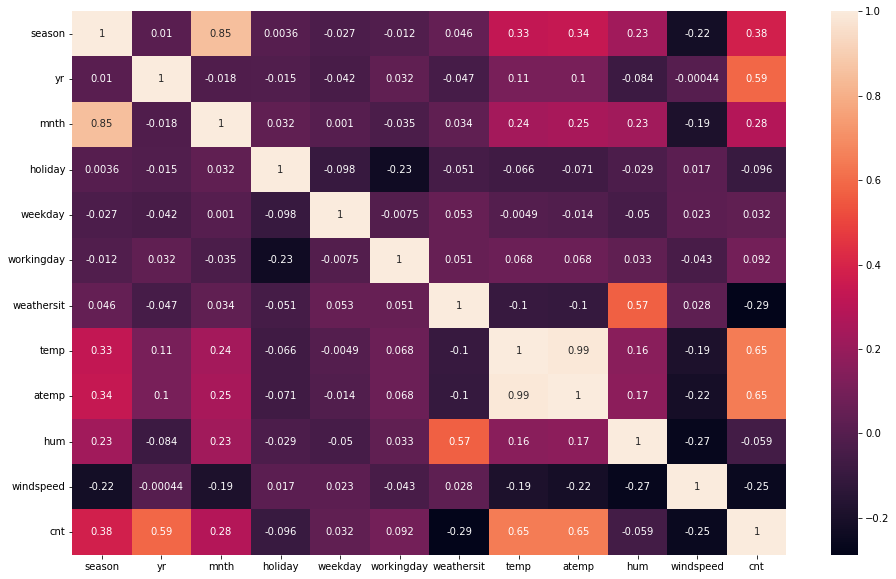

In [104]:
plt.figure(figsize=(16,10))
sns.heatmap(df_train.corr(), annot=True)

### Note:
- Here temp and atemp has high correlation.
- Here we can start with the temp variable.

In [105]:
# Remove the dependent or output variable.
y_train = df_train.pop('cnt')
x_train = df_train

In [106]:
#Take the first var temp in model building
#add a constant 
x_train_sm = sm.add_constant(x_train['temp'])
x_train_sm.head()

,const,temp
576,1.0,0.815169
426,1.0,0.442393
728,1.0,0.245101
482,1.0,0.395666
111,1.0,0.345824


In [107]:
# Create the first model with temp var.
lr = sm.OLS(y_train, x_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     362.0
Date:                Tue, 13 Sep 2022   Prob (F-statistic):           2.46e-61
Time:                        18:11:13   Log-Likelihood:                 176.09
No. Observations:                 510   AIC:                            -348.2
Df Residuals:                     508   BIC:                            -339.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1690      0.020      8.608      0.000       0.130       0.208
temp           0.6409      0.034     19.026      0.000       0.575       0.707
==============================================================================
Omnibus:                        6.355   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                4.521
Skew:                           0.088   Prob(JB):                        0.104
Kurtosis:                       2.574   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Note: 
#### Here we can see that the p-value of temp is 0.0, so the coefficient 0.64 of temp is significant for count.

In [108]:
# Add another variable atemp and build the model.
x_train_sm = x_train[['temp', 'atemp']]
x_train_sm = sm.add_constant(x_train_sm)

lr_model = sm.OLS(y_train, x_train_sm).fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     184.0
Date:                Tue, 13 Sep 2022   Prob (F-statistic):           8.38e-61
Time:                        18:11:13   Log-Likelihood:                 178.05
No. Observations:                 510   AIC:                            -350.1
Df Residuals:                     507   BIC:                            -337.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1627      0.020      8.198      0.000       0.124       0.202
temp           0.1853      0.233      0.796      0.426      -0.272       0.643
atemp          0.4896      0.248      1.977      0.049       0.003       0.976
==============================================================================
Omnibus:                        4.986   Durbin-Watson:                   2.094
Prob(Omnibus):                  0.083   Jarque-Bera (JB):                3.696
Skew:                           0.070   Prob(JB):                        0.158
Kurtosis:                       2.607   Cond. No.                         56.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Note:
- Here we can see that by adding the atemp, the p-value of temp also increased. 
- And it is very high (~42% > 5%) so we can not add this in our model.
- Also it increase very small in R-squared.

In [109]:
# Add another variable windspeed and build the model.
x_train_sm = x_train[['temp', 'windspeed']]
x_train_sm = sm.add_constant(x_train_sm)

lr_model = sm.OLS(y_train, x_train_sm).fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     194.5
Date:                Tue, 13 Sep 2022   Prob (F-statistic):           1.99e-63
Time:                        18:11:13   Log-Likelihood:                 184.13
No. Observations:                 510   AIC:                            -362.3
Df Residuals:                     507   BIC:                            -349.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2409      0.026      9.156      0.000       0.189       0.293
temp           0.6154      0.034     18.213      0.000       0.549       0.682
windspeed     -0.1811      0.045     -4.030      0.000      -0.269      -0.093
==============================================================================
Omnibus:                       10.761   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.005   Jarque-Bera (JB):                7.285
Skew:                           0.155   Prob(JB):                       0.0262
Kurtosis:                       2.504   Cond. No.                         8.10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Note:
- Here R-squred increased with 0 p-value of all. So we can consider this variable in model. 

In [110]:
# Add another variable weathersit and build the model.
x_train_sm = x_train[['temp', 'windspeed', 'weathersit']]
x_train_sm = sm.add_constant(x_train_sm)

lr_model = sm.OLS(y_train, x_train_sm).fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                     158.1
Date:                Tue, 13 Sep 2022   Prob (F-statistic):           2.74e-72
Time:                        18:11:13   Log-Likelihood:                 207.53
No. Observations:                 510   AIC:                            -407.1
Df Residuals:                     506   BIC:                            -390.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2888      0.026     11.075      0.000       0.238       0.340
temp           0.5936      0.032     18.286      0.000       0.530       0.657
windspeed     -0.1784      0.043     -4.151      0.000      -0.263      -0.094
weathersit    -0.1834      0.026     -6.973      0.000      -0.235      -0.132
==============================================================================
Omnibus:                       11.190   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.004   Jarque-Bera (JB):                8.170
Skew:                           0.197   Prob(JB):                       0.0168
Kurtosis:                       2.520   Cond. No.                         8.26
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Note:
- Here R-squred increased (0.43 to 0.48) more with 0 p-value of all. So we can consider weathersit variable in model. 

In [111]:
# Add another variable mnth and build the model.
x_train_sm = x_train[['temp', 'windspeed', 'weathersit', 'mnth']]
x_train_sm = sm.add_constant(x_train_sm)

lr_model = sm.OLS(y_train, x_train_sm).fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                     126.2
Date:                Tue, 13 Sep 2022   Prob (F-statistic):           1.27e-74
Time:                        18:11:13   Log-Likelihood:                 215.63
No. Observations:                 510   AIC:                            -421.3
Df Residuals:                     505   BIC:                            -400.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2495      0.027      9.083      0.000       0.196       0.303
temp           0.5648      0.033     17.239      0.000       0.500       0.629
windspeed     -0.1521      0.043     -3.551      0.000      -0.236      -0.068
weathersit    -0.1899      0.026     -7.314      0.000      -0.241      -0.139
mnth           0.0945      0.023      4.039      0.000       0.049       0.141
==============================================================================
Omnibus:                        8.625   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.013   Jarque-Bera (JB):                6.094
Skew:                           0.138   Prob(JB):                       0.0475
Kurtosis:                       2.541   Cond. No.                         9.14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Note:
Here R-squared value increased with 0 p-value. So we can include the mnth var.

In [112]:
# Add another variable season and build the model.
x_train_sm = x_train[['temp', 'windspeed', 'weathersit', 'mnth', 'season']]
x_train_sm = sm.add_constant(x_train_sm)

lr_model = sm.OLS(y_train, x_train_sm).fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.517
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     107.8
Date:                Tue, 13 Sep 2022   Prob (F-statistic):           2.74e-77
Time:                        18:11:13   Log-Likelihood:                 224.41
No. Observations:                 510   AIC:                            -436.8
Df Residuals:                     504   BIC:                            -411.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2604      0.027      9.593      0.000       0.207       0.314
temp           0.5317      0.033     16.022      0.000       0.466       0.597
windspeed     -0.1382      0.042     -3.269      0.001      -0.221      -0.055
weathersit    -0.1967      0.026     -7.686      0.000      -0.247      -0.146
mnth          -0.0543      0.042     -1.285      0.199      -0.137       0.029
season         0.1561      0.037      4.200      0.000       0.083       0.229
==============================================================================
Omnibus:                       10.071   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                6.720
Skew:                           0.136   Prob(JB):                       0.0347
Kurtosis:                       2.508   Cond. No.                         11.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Note:
Here R-squared value increased with .19 p-value of mnth. So we need to remove the mnth variable.

In [113]:
# Add another variable season and build the model.
x_train_sm = x_train[['temp', 'windspeed', 'weathersit', 'season']]
x_train_sm = sm.add_constant(x_train_sm)

lr_model = sm.OLS(y_train, x_train_sm).fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-statistic:                     134.2
Date:                Tue, 13 Sep 2022   Prob (F-statistic):           5.03e-78
Time:                        18:11:13   Log-Likelihood:                 223.57
No. Observations:                 510   AIC:                            -437.1
Df Residuals:                     505   BIC:                            -416.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2509      0.026      9.600      0.000       0.200       0.302
temp           0.5353      0.033     16.176      0.000       0.470       0.600
windspeed     -0.1373      0.042     -3.246      0.001      -0.220      -0.054
weathersit    -0.1961      0.026     -7.657      0.000      -0.246      -0.146
season         0.1160      0.020      5.727      0.000       0.076       0.156
==============================================================================
Omnibus:                        9.949   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                6.724
Skew:                           0.140   Prob(JB):                       0.0347
Kurtosis:                       2.513   Cond. No.                         9.10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Note:
- Here R-squred increased (0.48 to 0.51) more with 0 p-value of all. So we can consider season variable in model. 

In [114]:
# Add another variable holiday and build the model.
x_train_sm = x_train[['temp', 'windspeed', 'weathersit', 'season', 'holiday']]
x_train_sm = sm.add_constant(x_train_sm)

lr_model = sm.OLS(y_train, x_train_sm).fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.516
Method:                 Least Squares   F-statistic:                     109.4
Date:                Tue, 13 Sep 2022   Prob (F-statistic):           4.32e-78
Time:                        18:11:13   Log-Likelihood:                 226.29
No. Observations:                 510   AIC:                            -440.6
Df Residuals:                     504   BIC:                            -415.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2563      0.026      9.809      0.000       0.205       0.308
temp           0.5294      0.033     16.021      0.000       0.464       0.594
windspeed     -0.1362      0.042     -3.234      0.001      -0.219      -0.053
weathersit    -0.1997      0.026     -7.818      0.000      -0.250      -0.150
season         0.1176      0.020      5.826      0.000       0.078       0.157
holiday       -0.1023      0.044     -2.322      0.021      -0.189      -0.016
==============================================================================
Omnibus:                       11.295   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.004   Jarque-Bera (JB):                7.314
Skew:                           0.142   Prob(JB):                       0.0258
Kurtosis:                       2.487   Cond. No.                         9.13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Note:
- Here R-squred increased small with 0.021 p-value of it. So we can also consider holiday variable in model. 

In [115]:
# Add another variable weekday and build the model.
x_train_sm = x_train[['temp', 'windspeed', 'weathersit', 'season', 'holiday', 'weekday']]
x_train_sm = sm.add_constant(x_train_sm)

lr_model = sm.OLS(y_train, x_train_sm).fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.523
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     91.85
Date:                Tue, 13 Sep 2022   Prob (F-statistic):           1.36e-77
Time:                        18:11:13   Log-Likelihood:                 227.56
No. Observations:                 510   AIC:                            -441.1
Df Residuals:                     503   BIC:                            -411.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2403      0.028      8.593      0.000       0.185       0.295
temp           0.5291      0.033     16.036      0.000       0.464       0.594
windspeed     -0.1374      0.042     -3.268      0.001      -0.220      -0.055
weathersit    -0.2017      0.026     -7.899      0.000      -0.252      -0.152
season         0.1184      0.020      5.873      0.000       0.079       0.158
holiday       -0.0957      0.044     -2.164      0.031      -0.183      -0.009
weekday        0.0329      0.021      1.588      0.113      -0.008       0.074
==============================================================================
Omnibus:                       13.028   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                7.541
Skew:                           0.108   Prob(JB):                       0.0230
Kurtosis:                       2.445   Cond. No.                         9.86
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Note:
Here R-squared value increase slightly with large p-value of weekday. So we can not consider this variable.

In [116]:
# Add another variable workingday and build the model.
x_train_sm = x_train[['temp', 'windspeed', 'weathersit', 'season', 'holiday', 'workingday']]
x_train_sm = sm.add_constant(x_train_sm)

lr_model = sm.OLS(y_train, x_train_sm).fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.523
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     91.92
Date:                Tue, 13 Sep 2022   Prob (F-statistic):           1.24e-77
Time:                        18:11:13   Log-Likelihood:                 227.66
No. Observations:                 510   AIC:                            -441.3
Df Residuals:                     503   BIC:                            -411.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2396      0.028      8.563      0.000       0.185       0.295
temp           0.5260      0.033     15.914      0.000       0.461       0.591
windspeed     -0.1336      0.042     -3.175      0.002      -0.216      -0.051
weathersit    -0.2018      0.026     -7.904      0.000      -0.252      -0.152
season         0.1190      0.020      5.900      0.000       0.079       0.159
holiday       -0.0855      0.045     -1.892      0.059      -0.174       0.003
workingday     0.0251      0.015      1.649      0.100      -0.005       0.055
==============================================================================
Omnibus:                        8.363   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.015   Jarque-Bera (JB):                6.253
Skew:                           0.159   Prob(JB):                       0.0439
Kurtosis:                       2.560   Cond. No.                         10.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Note:
Here R-squared value increase slightly with large p-value of workingday. So we can not consider this variable.

In [117]:
# Add another variable yr and build the model.
x_train_sm = x_train[['temp', 'windspeed', 'weathersit', 'season', 'holiday', 'yr']]
x_train_sm = sm.add_constant(x_train_sm)

lr_model = sm.OLS(y_train, x_train_sm).fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     322.7
Date:                Tue, 13 Sep 2022   Prob (F-statistic):          7.35e-169
Time:                        18:11:13   Log-Likelihood:                 441.48
No. Observations:                 510   AIC:                            -869.0
Df Residuals:                     503   BIC:                            -839.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1656      0.018      9.457      0.000       0.131       0.200
temp           0.4696      0.022     21.530      0.000       0.427       0.513
windspeed     -0.1483      0.028     -5.363      0.000      -0.203      -0.094
weathersit    -0.1842      0.017    -10.978      0.000      -0.217      -0.151
season         0.1245      0.013      9.397      0.000       0.098       0.151
holiday       -0.0952      0.029     -3.292      0.001      -0.152      -0.038
yr             0.2361      0.009     25.820      0.000       0.218       0.254
==============================================================================
Omnibus:                       51.503   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              113.869
Skew:                          -0.559   Prob(JB):                     1.88e-25
Kurtosis:                       5.027   Cond. No.                         9.88
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Note:
- Here R-squred increased .79 with 0 p-value of all. So we can also consider yr variable in model. 

In [118]:
# Add another variable hum and build the model.
x_train_sm = x_train[['temp', 'windspeed', 'weathersit', 'season', 'holiday', 'yr', 'hum']]
x_train_sm = sm.add_constant(x_train_sm)

lr_model = sm.OLS(y_train, x_train_sm).fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     280.8
Date:                Tue, 13 Sep 2022   Prob (F-statistic):          4.64e-169
Time:                        18:11:13   Log-Likelihood:                 444.94
No. Observations:                 510   AIC:                            -873.9
Df Residuals:                     502   BIC:                            -840.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2300      0.030      7.629      0.000       0.171       0.289
temp           0.4797      0.022     21.778      0.000       0.436       0.523
windspeed     -0.1701      0.029     -5.921      0.000      -0.227      -0.114
weathersit    -0.1506      0.021     -7.150      0.000      -0.192      -0.109
season         0.1290      0.013      9.711      0.000       0.103       0.155
holiday       -0.0940      0.029     -3.266      0.001      -0.151      -0.037
yr             0.2338      0.009     25.594      0.000       0.216       0.252
hum           -0.1087      0.042     -2.617      0.009      -0.190      -0.027
==============================================================================
Omnibus:                       52.541   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              118.006
Skew:                          -0.565   Prob(JB):                     2.37e-26
Kurtosis:                       5.068   Cond. No.                         18.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Note:
It slightly increase the R-squared value with 0 p-value. So we can consider the hum var also.

## VIF:
We should also check the VIF value of all selected variables. It should not be more than 5%.

In [119]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

x_train_vif = x_train[['temp', 'windspeed', 'weathersit', 'season', 'holiday', 'yr', 'hum']]

vif = pd.DataFrame()
vif['Features'] = x_train_vif.columns
vif['VIF'] = [variance_inflation_factor(x_train_vif.values, i) for i in range(x_train_vif.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
6,hum,12.56
0,temp,7.75
1,windspeed,3.46
3,season,3.39
2,weathersit,2.14
5,yr,2.00
4,holiday,1.03


## Note:
Here we can see that the VIF value of hum var is 12. It is higher than 5. So we have to drop it from the model.

In [120]:
# Remove the hum var from model.
x_train_sm = x_train[['temp', 'windspeed', 'weathersit', 'season', 'holiday', 'yr']]
x_train_sm = sm.add_constant(x_train_sm)

lr_model = sm.OLS(y_train, x_train_sm).fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     322.7
Date:                Tue, 13 Sep 2022   Prob (F-statistic):          7.35e-169
Time:                        18:11:13   Log-Likelihood:                 441.48
No. Observations:                 510   AIC:                            -869.0
Df Residuals:                     503   BIC:                            -839.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1656      0.018      9.457      0.000       0.131       0.200
temp           0.4696      0.022     21.530      0.000       0.427       0.513
windspeed     -0.1483      0.028     -5.363      0.000      -0.203      -0.094
weathersit    -0.1842      0.017    -10.978      0.000      -0.217      -0.151
season         0.1245      0.013      9.397      0.000       0.098       0.151
holiday       -0.0952      0.029     -3.292      0.001      -0.152      -0.038
yr             0.2361      0.009     25.820      0.000       0.218       0.254
==============================================================================
Omnibus:                       51.503   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              113.869
Skew:                          -0.559   Prob(JB):                     1.88e-25
Kurtosis:                       5.027   Cond. No.                         9.88
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## This is our final model.
cnt = 0.1656 + (temp*0.4696) + (windspeed*-0.1483) + (weathersit*-0.1842) + (season*0.1245) + (holiday*-0.0952) + (yr*0.2361)

## 4. Residual Analysis
- Residual: Difference between the actual and predicted y value. It is also called error terms.


There were two assumptions which we did befor model building.
1. The error terms should be normally distributed with mean equal to 0.
2. The error terms should be independent of each other.

We need to check verify that both assumptions should not be violated by model.

### 1. Check assumption 1

In [121]:
# To check 1st assumption, we just plot a histogram of the error terms.
# And check whether they are normally distributed.
#error term = y_train - y_model_predicated
y_train_pred = lr_model.predict(x_train_sm)

/Users/ramesh/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

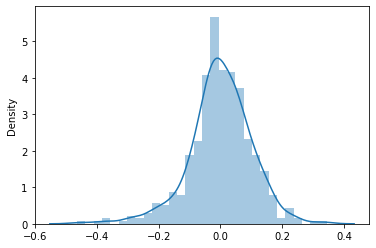

In [122]:
res = y_train - y_train_pred
sns.distplot(res)

Notes:
- Here we can see that the plot has middle value 0.
- Also the shape looks like normaly distributed.
### So we can conclude that the error terms are normally distributed.

### 2. Check assumption 2

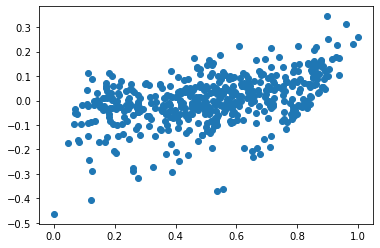

In [123]:
# To check it we need to plot the error terms, this time with either of X or y to check for any patterns.
# Looks for the patterns in residual and there should not be identify any pattern.
plt.scatter(y_train, res)

Note:
- There is no pattern between y_train and residual.

### So no patterns.

## 5. Predictions and evaluation on test set

In [124]:
#Lets find the r-squared for test set and compare with r-squared of train set.
# 1. Scale it
df_test[convt_col] = scaler.transform(df_test[convt_col])
df_test.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
184,0.666667,0,0.545455,1,0.166667,0,0.5,0.831783,0.769660,0.657364,0.084219,0.692706
535,0.333333,1,0.454545,0,0.500000,1,0.0,0.901354,0.842587,0.610133,0.153728,0.712034
299,1.000000,0,0.818182,0,0.666667,1,0.5,0.511964,0.496145,0.837699,0.334206,0.303382
221,0.666667,0,0.636364,0,0.500000,1,0.0,0.881625,0.795343,0.437098,0.339570,0.547400
152,0.333333,0,0.454545,0,0.666667,1,0.0,0.817246,0.741471,0.314298,0.537414,0.569029


In [125]:
df_test.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.487879,0.481818,0.499174,0.036364,0.502273,0.700000,0.186364,0.558718,0.532847,0.638221,0.313293,0.522154
std,0.370602,0.500809,0.311120,0.187620,0.330843,0.459303,0.269102,0.233187,0.217401,0.148694,0.159584,0.219163
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.272727,0.000000,0.166667,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595
50%,0.333333,0.000000,0.454545,0.000000,0.500000,1.000000,0.000000,0.558172,0.544652,0.625590,0.300126,0.524678
75%,0.666667,1.000000,0.727273,0.000000,0.833333,1.000000,0.500000,0.755981,0.713308,0.743798,0.402718,0.677750
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300


Note: 
- Here we can see that the max value for few variables are more than 1. 
- It is happening because we not fit the data we just transform it for test set. 
- It is because of the outliers.

scaler.transform

In [126]:
y_test = df_test.pop('cnt')
x_test = df_test

In [127]:
# Take model variable and add constant
x_test_sm = x_test[['temp', 'windspeed', 'weathersit', 'season', 'holiday', 'yr']]
x_test_sm = sm.add_constant(x_test_sm)
x_test_sm.head()

,const,temp,windspeed,weathersit,season,holiday,yr
184,1.0,0.831783,0.084219,0.5,0.666667,1,0
535,1.0,0.901354,0.153728,0.0,0.333333,0,1
299,1.0,0.511964,0.334206,0.5,1.000000,0,0
221,1.0,0.881625,0.339570,0.0,0.666667,0,0
152,1.0,0.817246,0.537414,0.0,0.333333,0,0


In [128]:
y_test_pred = lr_model.predict(x_test_sm)

In [129]:
#Evaluate the model
from sklearn.metrics import r2_score

In [130]:
r2 = r2_score(y_true=y_test, y_pred=y_test_pred)
r2

0.7737566371488735

## Note:

Here both training and test data sets r2 are much similar.